In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


In [ ]:
# reading csv file
athlete_events = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')

In [ ]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]

In [ ]:
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# get the data for summer Olympic
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()



,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.0,NaN,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


In [ ]:
# print out every sport in the summer Olympic
summer_data["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

Badminton

In [ ]:
# For loop to train the Logistic Regression model and get the testing score for male athletes in every Summer Olympic Sport

athlete_m = summer_data[(summer_data["Sport"] == 'Badminton' ) & (summer_data["Sex"] == "M")]
athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
# One-hot encoding                
athlete_m = athlete_m.replace("Gold", 1)
athlete_m = athlete_m.replace("Silver", 1)
athlete_m = athlete_m.replace("Bronze", 1)
athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
athlete_m = athlete_m.dropna()
athlete_m["Medal"].unique()
        
# Assign X (data) and y (target)        
X1 = athlete_m[['Height', "Weight", "Age"]] 
print(X1.shape) 
y1 = athlete_m['Medal'] 
print(y1.shape)

# Split our data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
        
# Create a Logistic Regression Model
classifier = LogisticRegression() 
        
#Fit (train) or model using the training data
classifier.fit(X1_train, y1_train)
        
#Validate the model using the test data
print(f"Training Data Score: {classifier.score(X1_train, y1_train)}") 
print(f"Testing Data Score: {classifier.score(X1_test, y1_test)}")
        
# Predict the testing data point
predictions = classifier.predict(X1_test)

pd.DataFrame({"Prediction": predictions, "Actual": y1_test})

    

(702, 3)
(702,)
Training Data Score: 0.8821292775665399
Testing Data Score: 0.8920454545454546


,Prediction,Actual
493,0.0,0.0
164,0.0,0.0
54,0.0,0.0
641,0.0,0.0
607,0.0,0.0
...,...,...
557,0.0,0.0
176,0.0,0.0
235,0.0,0.0
331,0.0,0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       157
         1.0       0.00      0.00      0.00        19

    accuracy                           0.89       176
   macro avg       0.45      0.50      0.47       176
weighted avg       0.80      0.89      0.84       176



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

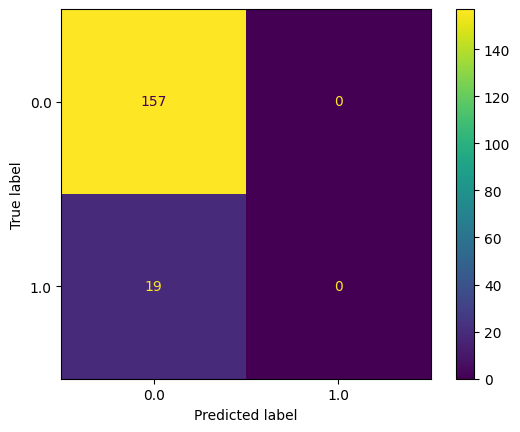

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y1_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

Football

In [ ]:
# For loop to train the Logistic Regression model and get the testing score for male athletes in every Summer Olympic Sport

athlete_m = summer_data[(summer_data["Sport"] == 'Football' ) & (summer_data["Sex"] == "M")]
athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
# One-hot encoding                
athlete_m = athlete_m.replace("Gold", 1)
athlete_m = athlete_m.replace("Silver", 1)
athlete_m = athlete_m.replace("Bronze", 1)
athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
athlete_m = athlete_m.dropna()
athlete_m["Medal"].unique()
        
# Assign X (data) and y (target)        
X1 = athlete_m[['Height', "Weight", "Age"]] 
print(X1.shape) 
y1 = athlete_m['Medal'] 
print(y1.shape)

# Split our data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
        
# Create a Logistic Regression Model
classifier = LogisticRegression() 
        
#Fit (train) or model using the training data
classifier.fit(X1_train, y1_train)
        
#Validate the model using the test data
print(f"Training Data Score: {classifier.score(X1_train, y1_train)}") 
print(f"Testing Data Score: {classifier.score(X1_test, y1_test)}")
        
# Predict the testing data point
predictions = classifier.predict(X1_test)

pd.DataFrame({"Prediction": predictions, "Actual": y1_test})

    

(3459, 3)
(3459,)
Training Data Score: 0.776792598303778
Testing Data Score: 0.7641618497109827


,Prediction,Actual
684,0.0,0.0
421,0.0,1.0
2755,0.0,1.0
2285,0.0,0.0
2677,0.0,0.0
...,...,...
90,0.0,0.0
2404,0.0,0.0
889,0.0,1.0
3276,0.0,0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87       661
         1.0       0.00      0.00      0.00       204

    accuracy                           0.76       865
   macro avg       0.38      0.50      0.43       865
weighted avg       0.58      0.76      0.66       865



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

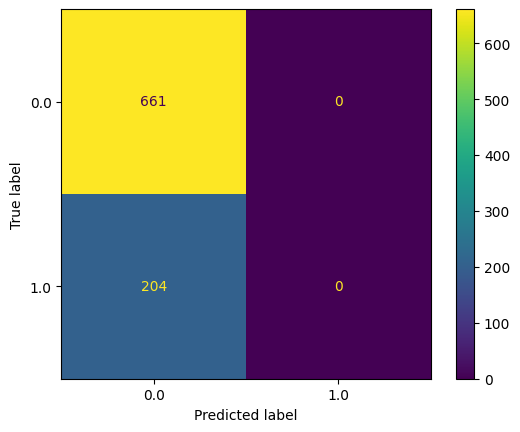

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y1_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()